# 라이브러리 임포트

In [49]:
! pip install -U pandas-profiling
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling
%matplotlib inline

In [50]:
X_train = pd.read_csv('./dataset/X_train_resampled.csv')
y_train = pd.read_csv('./dataset/y_train_resampled.csv')
test = pd.read_csv('./dataset/test.csv')
train= pd.concat([X_train, y_train], axis = 1)

In [51]:
train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,quality
0,8.000000,0.180000,0.370000,1.300000,0.040000,15.000000,96.000000,0.991200,3.060000,0.610000,12.100000,0,6
1,7.500000,0.380000,0.290000,4.900000,0.021000,38.000000,113.000000,0.990260,3.080000,0.480000,13.000000,0,7
2,6.100000,0.270000,0.330000,2.200000,0.021000,26.000000,117.000000,0.988600,3.120000,0.300000,12.500000,0,6
3,6.400000,0.320000,0.500000,10.700000,0.047000,57.000000,206.000000,0.996800,3.080000,0.600000,9.400000,0,5
4,8.400000,0.370000,0.430000,2.300000,0.063000,12.000000,19.000000,0.995500,3.170000,0.810000,11.200000,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6716,7.035201,0.258352,0.440824,6.828082,0.027000,24.670403,126.164799,0.992918,3.063672,0.352360,11.108240,0,8
6717,6.546223,0.253462,0.443269,6.021267,0.027000,23.692445,126.653777,0.992673,3.193251,0.389033,11.132689,0,8
6718,7.181498,0.259815,0.440093,7.069471,0.027000,24.962995,126.018502,0.992991,3.024903,0.341388,11.100925,0,8
6719,6.877364,0.257656,0.326405,2.387483,0.042008,28.062585,128.000000,0.993501,3.364607,0.622423,10.935153,0,8


# Quality(target) 별 train data 개수 분석

Int64Index([6, 8, 4, 7, 5], dtype='int64')


<BarContainer object of 5 artists>

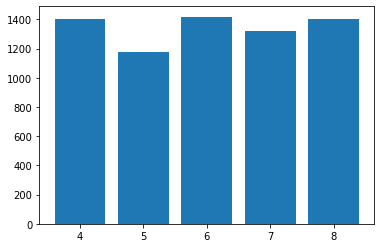

In [52]:
counted_values = train['quality'].value_counts()
print(counted_values.index)
plt.bar(x=counted_values.index, height=counted_values)

4하고 8의 개수가 다른 data에 비해 매우 적은 것을 볼 수 있다

# Quality별, feature 분석

1. Mean
2. Feature distribution

In [53]:
train_grouped = train.groupby('quality').mean()
train_grouped

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
quality,,,,,,,,,,,,
4,7.320479,0.471398,0.260957,3.927430,0.058162,20.951102,103.395148,0.994864,3.233423,0.508490,10.158252,0.201141
5,7.339403,0.383318,0.311519,5.809162,0.064386,30.448826,120.482419,0.995811,3.205133,0.527911,9.868767,0.307301
6,7.161142,0.309870,0.323886,5.548942,0.054214,30.960860,115.722849,0.994518,3.213801,0.531065,10.578573,0.217207
7,7.123734,0.292702,0.333489,4.623750,0.044997,30.400613,108.834587,0.993015,3.224805,0.543125,11.444113,0.162244
8,6.698473,0.296478,0.324016,4.721838,0.041317,34.602691,116.946444,0.992170,3.247730,0.521419,11.765491,0.066239


총 11개 feature

Text(0.5, 0.98, 'Mean Values per Quality')

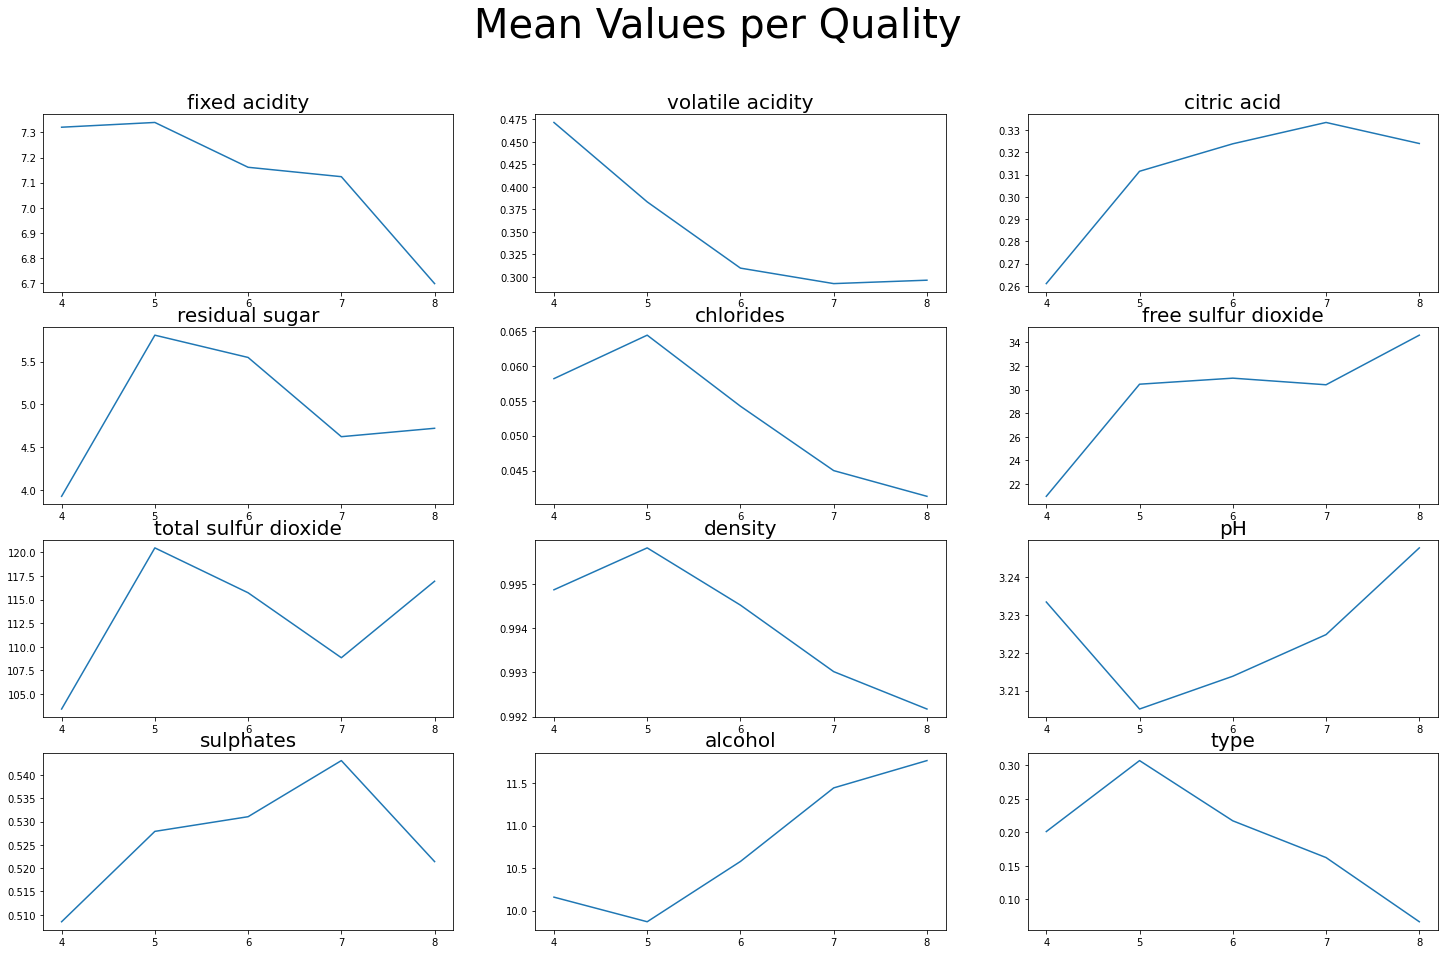

In [54]:
fig, axes = plt.subplots(4,3, figsize=(25,15))
for ax, col in zip(axes.flatten(), train_grouped.columns):
    # 그래프 별 제목
    ax.set_title(col, fontsize=20)
    # x축 눈금 설정
    ax.set_xticks([4,5,6,7,8])
    # 그래프 데이터
    ax.plot([4,5,6,7,8], train_grouped[col])
fig.suptitle("Mean Values per Quality", fontsize=40)


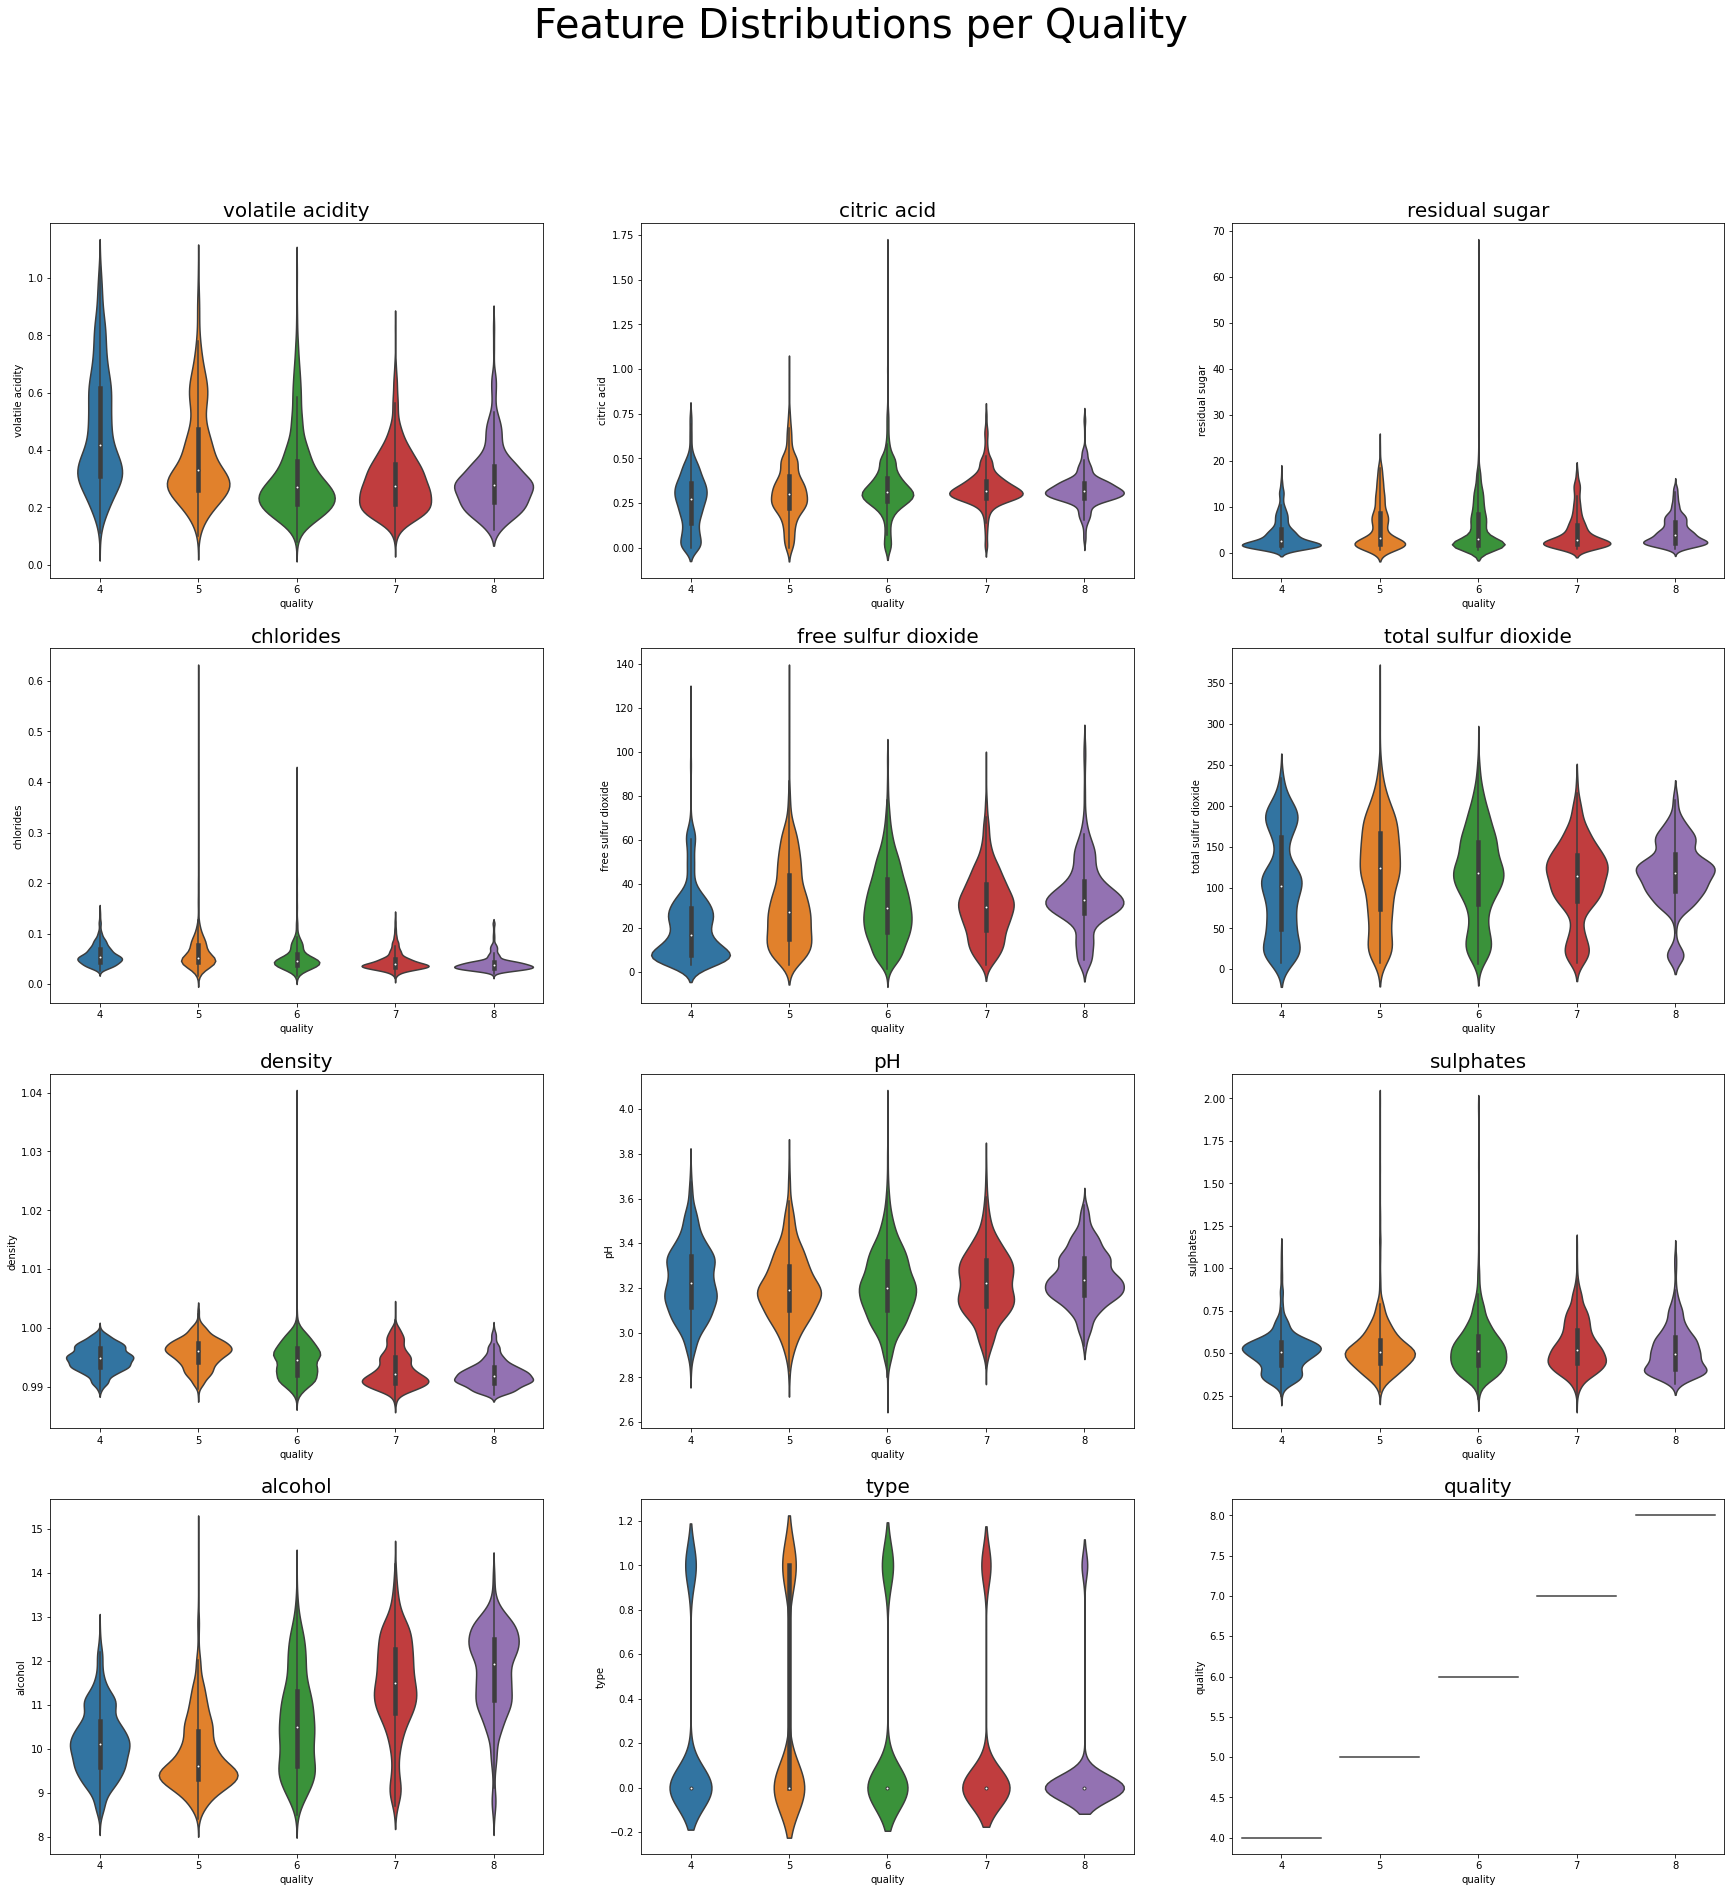

In [47]:
fig, axes = plt.subplots(4,3,figsize=(30,30))

fig.suptitle('Feature Distributions per Quality', fontsize=40)
for ax, col in zip(axes.flatten(), train.columns[1:]):
    ax.set_title(col, fontsize=20)
    sns.violinplot(x = 'quality', y = col, ax = ax, data = train)

# 상관 관계

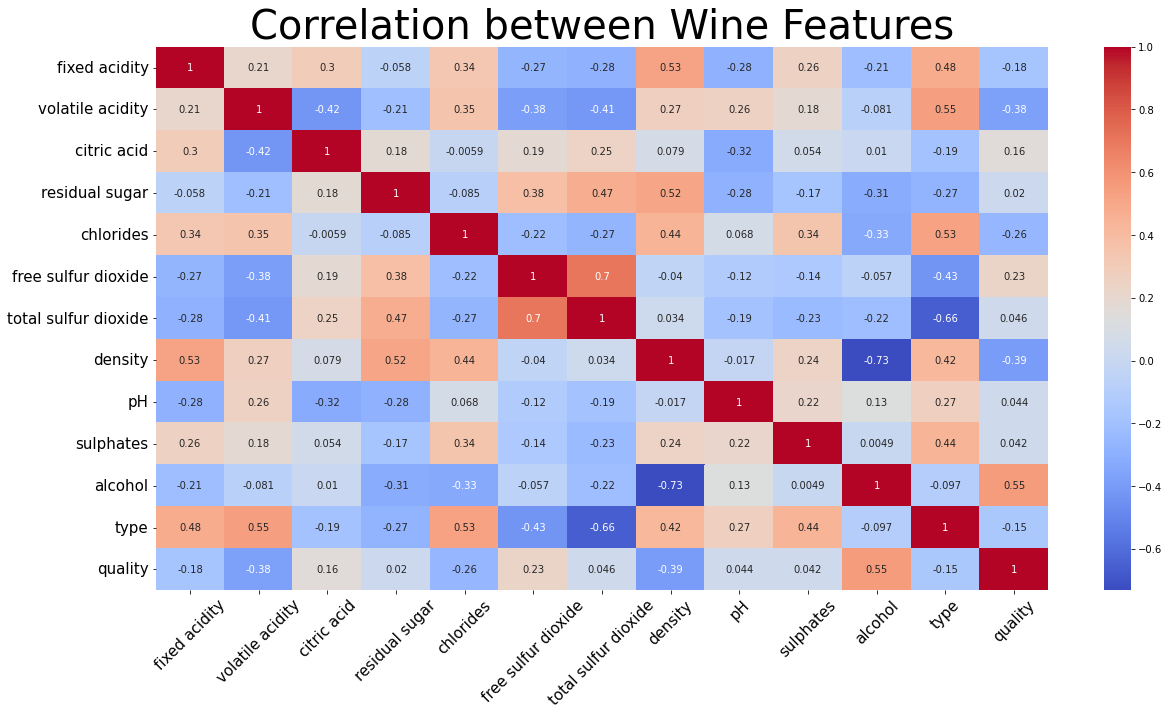

In [55]:
plt.figure(figsize=(20,10))

heat_table = train.corr()
heatmap_ax = sns.heatmap(data = heat_table, annot=True, cmap='coolwarm')
heatmap_ax.set_xticklabels(heatmap_ax.get_xticklabels(), fontsize = 15, rotation=45 )
heatmap_ax.set_yticklabels(heatmap_ax.get_yticklabels(), fontsize = 15)
plt.title('Correlation between Wine Features', fontsize = 40)
plt.show()

## 다음 두가지를 분석해보자
- total sulfur dioxide, free sulfur dioxide
- alcohol, density

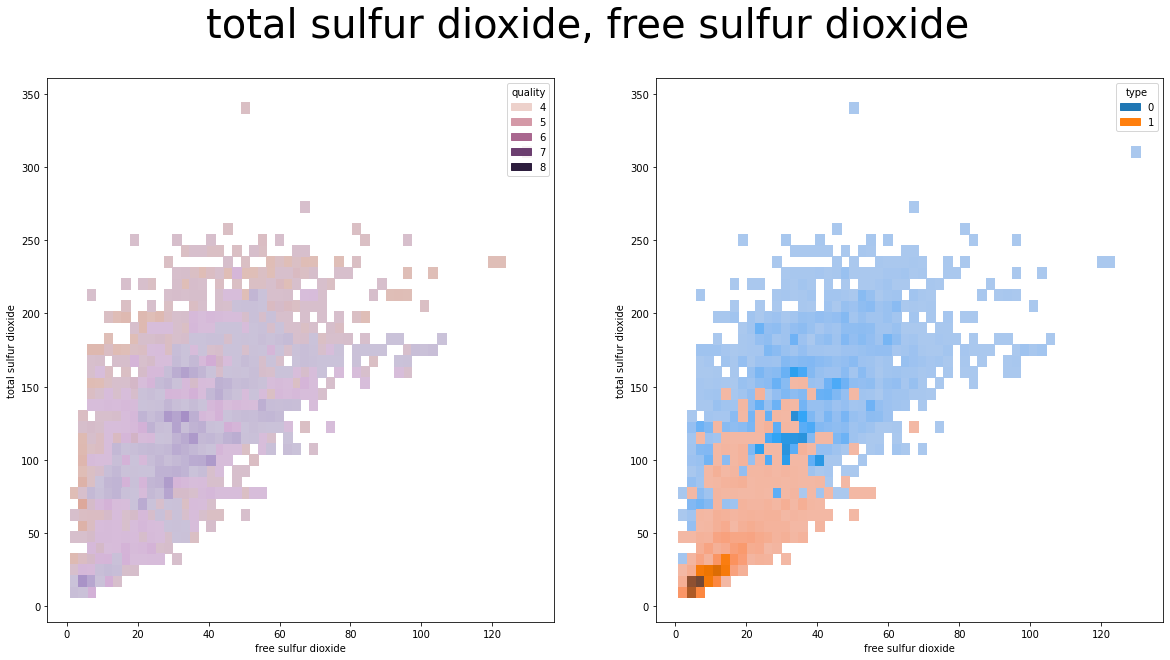

In [56]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))

for i,ax in enumerate(axes):
    if i== 0:
        sns.histplot(x = 'free sulfur dioxide', y = 'total sulfur dioxide', hue = 'quality', data = train, ax = ax)
    else :
        sns.histplot(x = 'free sulfur dioxide', y = 'total sulfur dioxide', hue = 'type', data = train, ax = ax)
fig.suptitle('total sulfur dioxide, free sulfur dioxide', fontsize=40)
plt.show()

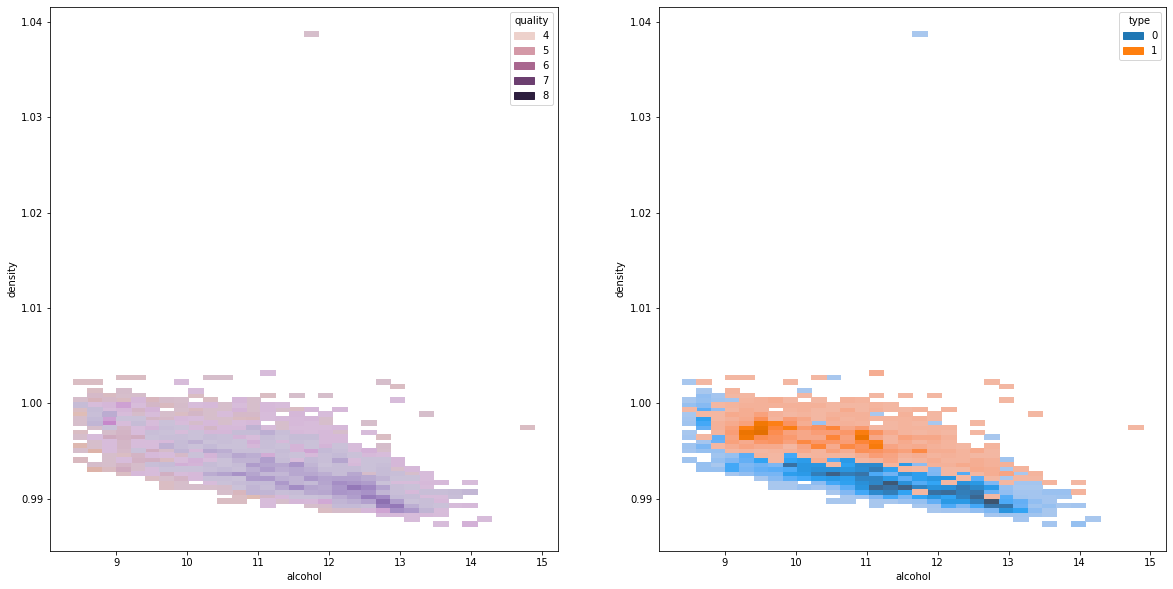

In [57]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))

for i,ax in enumerate(axes):
    if i== 0:
        sns.histplot(x = 'alcohol', y = 'density', hue = 'quality', data = train, ax = ax)
    else :
        sns.histplot(x = 'alcohol', y = 'density', hue = 'type', data = train, ax = ax)

plt.show()

density > 1.03인 outlier(이상치)를 제거해보자

In [58]:
train_ = train[train.density < 1.03]

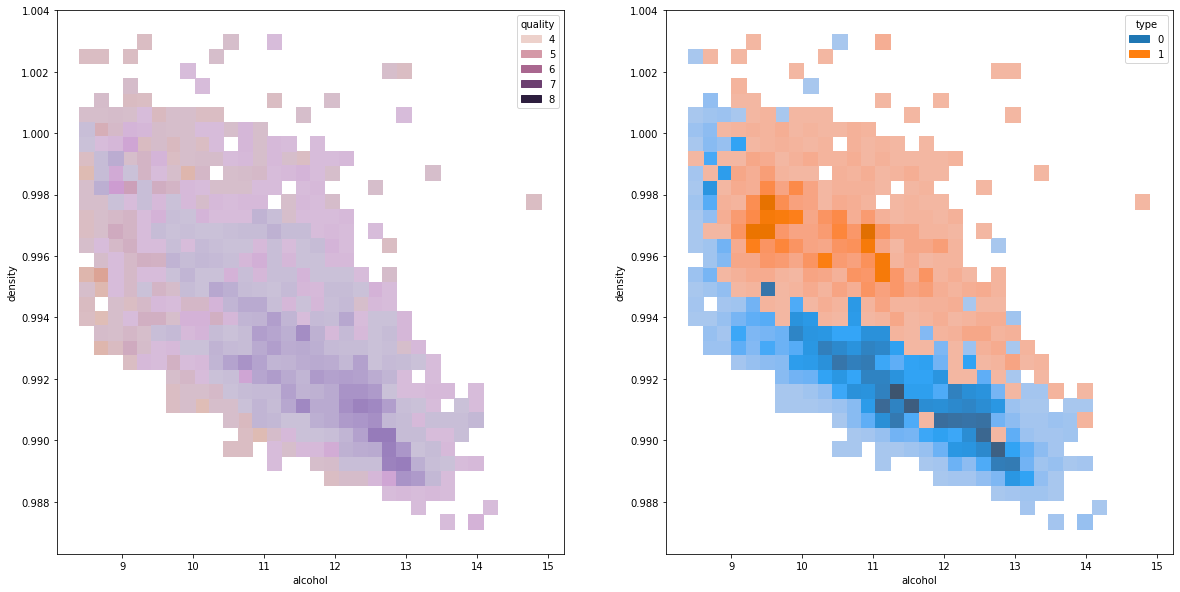

In [59]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))

for i,ax in enumerate(axes):
    if i== 0:
        sns.histplot(x = 'alcohol', y = 'density', hue = 'quality', data = train_, ax = ax)
    else :
        sns.histplot(x = 'alcohol', y = 'density', hue = 'type', data = train_, ax = ax)

plt.show()

- 훨씬 데이터가 깨끗하게 나오는 걸 볼 수 있다. Outlier를 제거하면 데이터의 분포를 더 잘 보는데 도움이 된다
- 어느정도 음의 상관관계를 띄고 있다

In [60]:
train[train['density']>1.03]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,quality
1368,7.8,0.965,0.6,65.8,0.074,8.0,160.0,1.03898,3.39,0.69,11.7,0,6


```density > 1.03``` 

```residual sugar > 65``` 

두 outlier를 가지고 있는 항목이 같은 항목이었음을 확인할 수 있다. 제거해준다

In [61]:
train = train[train['density'] < 1.03]

In [62]:
train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,quality
0,8.000000,0.180000,0.370000,1.300000,0.040000,15.000000,96.000000,0.991200,3.060000,0.610000,12.100000,0,6
1,7.500000,0.380000,0.290000,4.900000,0.021000,38.000000,113.000000,0.990260,3.080000,0.480000,13.000000,0,7
2,6.100000,0.270000,0.330000,2.200000,0.021000,26.000000,117.000000,0.988600,3.120000,0.300000,12.500000,0,6
3,6.400000,0.320000,0.500000,10.700000,0.047000,57.000000,206.000000,0.996800,3.080000,0.600000,9.400000,0,5
4,8.400000,0.370000,0.430000,2.300000,0.063000,12.000000,19.000000,0.995500,3.170000,0.810000,11.200000,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6716,7.035201,0.258352,0.440824,6.828082,0.027000,24.670403,126.164799,0.992918,3.063672,0.352360,11.108240,0,8
6717,6.546223,0.253462,0.443269,6.021267,0.027000,23.692445,126.653777,0.992673,3.193251,0.389033,11.132689,0,8
6718,7.181498,0.259815,0.440093,7.069471,0.027000,24.962995,126.018502,0.992991,3.024903,0.341388,11.100925,0,8
6719,6.877364,0.257656,0.326405,2.387483,0.042008,28.062585,128.000000,0.993501,3.364607,0.622423,10.935153,0,8
